In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
display(df.head())
print("\nDataset Info:")
print(df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
df = df.dropna(subset=["Exited"])

# Separate features & target
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Scale numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "Gradient Boosting": GradientBoostingClassifier()
}

trained_models = {}
for name, model in models.items():
    print(f"Training: {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

Training: Logistic Regression...
Training: Random Forest...
Training: Gradient Boosting...


In [8]:
def evaluate(name, model):
    y_pred = model.predict(X_test)

    print(f"\n==========================")
    print(f"MODEL: {name}")
    print("==========================")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm, annot=True, cmap="Blues",
        xticklabels=["Not Churn", "Churn"],
        yticklabels=["Not Churn", "Churn"]
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


MODEL: Logistic Regression
Accuracy: 0.8104

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1991
           1       0.64      0.16      0.25       509

    accuracy                           0.81      2500
   macro avg       0.73      0.57      0.57      2500
weighted avg       0.78      0.81      0.76      2500



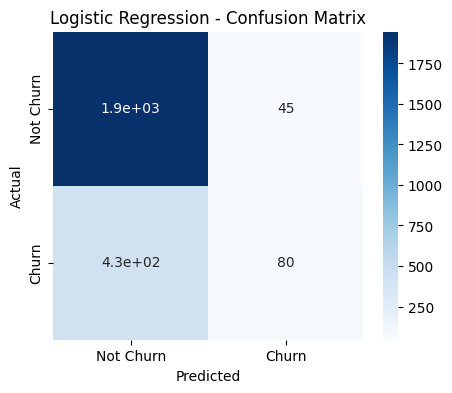


MODEL: Random Forest
Accuracy: 0.866

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.80      0.46      0.58       509

    accuracy                           0.87      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



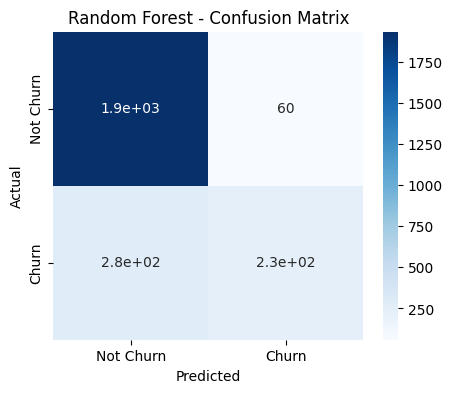


MODEL: Gradient Boosting
Accuracy: 0.8716

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.80      0.50      0.61       509

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.87      0.87      0.86      2500



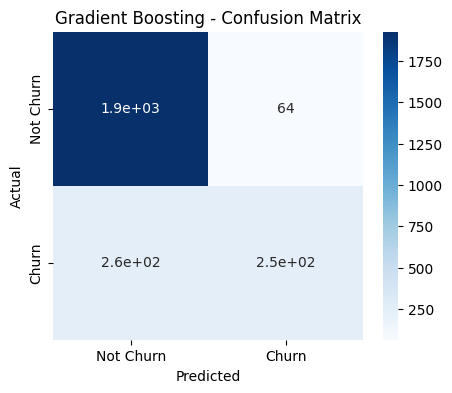


🎯 ALL MODELS TRAINED & EVALUATED SUCCESSFULLY!


In [9]:
for name, model in trained_models.items():
    evaluate(name, model)

print("\n🎯 ALL MODELS TRAINED & EVALUATED SUCCESSFULLY!")